# Chocolate Scraping with Beautiful Soup

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

1. Let's make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
```
   

In [1]:
import seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
webpage = webpage_response.content


3. Creating a BeautifulSoup object called `soup` to traverse this HTML.



In [2]:
soup = BeautifulSoup(webpage, 'html.parser')

## How are ratings distributed?

4. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   


In [3]:
ratings = []

In [4]:
rating_tags = soup.find_all(attrs={'class':"Rating"})


In [5]:
for rating in rating_tags[1:]:
    rating_text = rating.get_text()
    rating_float = float(rating_text)
    ratings.append(rating_float)



5. Using Matplotlib, creating a histogram of the ratings values:



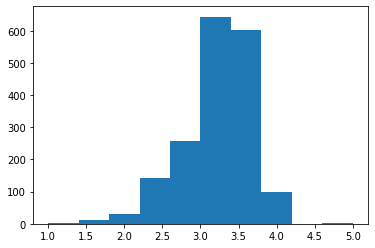

In [6]:
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

6. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [7]:

company_tags = soup.find_all(attrs={'class': 'Company'})



7. Just like we did with ratings, we now want to make an empty list to hold company names.

In [8]:
companies = []


In [9]:

for company in company_tags[1:]:
    company_text = company.get_text()
    companies.append(company_text)



8. Creating a DataFrame with a column "Company" corresponding to  companies list, and a column "Ratings" corresponding to ratings list.

In [10]:
columns_rating_company = {"Company": companies, "Ratings": ratings}
rating_company_df = pd.DataFrame.from_dict(columns_rating_company)
print(rating_company_df)

       Company  Ratings
0     A. Morin     3.75
1     A. Morin     2.75
2     A. Morin     3.00
3     A. Morin     3.50
4     A. Morin     3.50
...        ...      ...
1790    Zotter     3.75
1791    Zotter     3.00
1792    Zotter     3.50
1793    Zotter     3.25
1794    Zotter     3.00

[1795 rows x 2 columns]


9. Using `.grouby` to group DataFrame by Company and taking the average of the grouped ratings.

    Then, we will get the 10 highest rated chocolate companies. 

In [11]:
company_mean_ratings = rating_company_df.groupby("Company").Ratings.mean()
ten_best_company = company_mean_ratings.nlargest(10)
print(ten_best_company)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

10. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.
    

In [12]:
cacao_percents = []
cacao_percent_tags = soup.select('.CocoaPercent')

for cacao in cacao_percent_tags[1:]:
    cacao_text = float(cacao.get_text().strip('%'))
    cacao_percents.append(cacao_text)
    


In [13]:
company_columns = {'Company': companies, 'Ratings': ratings, 'CocoaPercentage': cacao_percents}
company_ratings_df = pd.DataFrame.from_dict(company_columns)
print(company_ratings_df)

       Company  Ratings  CocoaPercentage
0     A. Morin     3.75             63.0
1     A. Morin     2.75             70.0
2     A. Morin     3.00             70.0
3     A. Morin     3.50             70.0
4     A. Morin     3.50             70.0
...        ...      ...              ...
1790    Zotter     3.75             70.0
1791    Zotter     3.00             65.0
1792    Zotter     3.50             65.0
1793    Zotter     3.25             62.0
1794    Zotter     3.00             65.0

[1795 rows x 3 columns]


11. Making a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).


17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

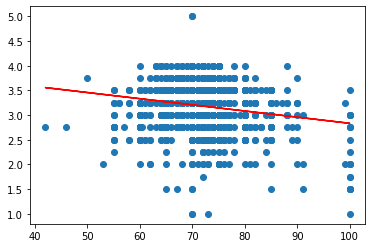

In [14]:
plt.clf()

plt.scatter(company_ratings_df.CocoaPercentage, company_ratings_df.Ratings)
z = np.polyfit(company_ratings_df.CocoaPercentage, company_ratings_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(company_ratings_df.CocoaPercentage, line_function(company_ratings_df.CocoaPercentage), "r-")
plt.show()

12. It looks like there is no significant evidence that cocoa percentage has an important effect on ratings.

13. Let's find where the best coffee-companies located. First, we find all countries from the page.

In [15]:
countries = []
country_tags = soup.find_all(attrs = {'class': 'CompanyLocation'})

for country in country_tags[1:]:
    country_text = country.get_text()
    countries.append(country_text)
    


14. Next, we create a dataframe made of countries and ratings.
Let's find the average rating of companies in a country.
Below, we show the the top 20 countries that have the top average ratings.

In [16]:
columns_countries = {"Company Location": countries, "Ratings": ratings, "Company": companies}
country_ratings_df = pd.DataFrame.from_dict(columns_countries)
country_means = country_ratings_df.groupby('Company Location').Ratings.mean()
print(country_means.nlargest(20))

Company Location
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Switzerland    3.342105
Singapore      3.333333
Italy          3.325397
Scotland       3.325000
Canada         3.324000
Argentina      3.305556
Denmark        3.283333
Spain          3.270000
France         3.251603
Bolivia        3.250000
Name: Ratings, dtype: float64


15. Where are the best 20 top rated coffee companies located in?

In [17]:
#country_ratings_df.sort_values(by=['Ratings'], ascending=False)

country_ratings_df.nlargest(20, 'Ratings')


,Company Location,Ratings,Company
78,Italy,5.0,Amedei
86,Italy,5.0,Amedei
9,France,4.0,A. Morin
17,France,4.0,A. Morin
20,France,4.0,A. Morin
54,U.S.A.,4.0,Amano
56,U.S.A.,4.0,Amano
76,Italy,4.0,Amedei
77,Italy,4.0,Amedei
83,Italy,4.0,Amedei


16. That seems people in Italy are the luckiest in reaching best coffee brands.

In [18]:
bean_origins = []

bean_tags = soup.find_all(attrs={'class': 'BroadBeanOrigin'})

for bean in bean_tags[1:]:
    bean_text = bean.get_text()
    bean_origins.append(bean_text)
    

bean_columns = {'Origin': bean_origins, "Ratings": ratings}
bean_origins_df = pd.DataFrame.from_dict(bean_columns)


In [19]:
bean_origins_df.nlargest(20, 'Ratings')

,Origin,Ratings
78,Venezuela,5.0
86,,5.0
9,Peru,4.0
17,Venezuela,4.0
20,Peru,4.0
54,Papua New Guinea,4.0
56,Ecuador,4.0
76,Venezuela,4.0
77,,4.0
83,Madagascar,4.0


Above, we can see the top 20 coffee beans' origins. 